This Project concentrates on exploring Cardio Vascular Disease Dataset. Use all EDA techniques to analyse tand summarize the findings after the analysis.

In [14]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Input the data, to analyse!

In [15]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train (1).csv


KeyboardInterrupt: ignored

In [3]:
import io
cardio = pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']), delimiter = ';',index_col = 'id')

In [4]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
cardio.shape

(70000, 12)

In [6]:
#To check if there are any  null data and datatypes of columns

cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


We can see that we need to change the column's headings to more understanding and easier way to visualise. [Then convert age to years as it is represented in days] The column details can be found in [this link](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) .

In [7]:
cardio.columns = ['age', 'gender', 'height_cm', 'weight_kg','sys_bp', 'dia_bp', 'cholestrol', 'glucose', 'smoking',
                  'alcohol_in', 'active', 'cardio']

In [8]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         70000 non-null  int64  
 1   gender      70000 non-null  int64  
 2   height_cm   70000 non-null  int64  
 3   weight_kg   70000 non-null  float64
 4   sys_bp      70000 non-null  int64  
 5   dia_bp      70000 non-null  int64  
 6   cholestrol  70000 non-null  int64  
 7   glucose     70000 non-null  int64  
 8   smoking     70000 non-null  int64  
 9   alcohol_in  70000 non-null  int64  
 10  active      70000 non-null  int64  
 11  cardio      70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [9]:
cardio.describe()

,age,gender,height_cm,weight_kg,sys_bp,dia_bp,cholestrol,glucose,smoking,alcohol_in,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Checking once again if there any null values and handling them!

In [10]:
cardio.isnull().sum()

age           0
gender        0
height_cm     0
weight_kg     0
sys_bp        0
dia_bp        0
cholestrol    0
glucose       0
smoking       0
alcohol_in    0
active        0
cardio        0
dtype: int64

Checking for Duplicate Data!

In [11]:
duplicate = cardio.duplicated()
cardio[duplicate]

,age,gender,height_cm,weight_kg,sys_bp,dia_bp,cholestrol,glucose,smoking,alcohol_in,active,cardio
id,,,,,,,,,,,,
15094,20495,1,165,70.0,120,80,1,1,0,0,1,0
31110,16793,1,165,68.0,120,80,1,1,0,0,1,0
54977,18988,1,164,65.0,120,80,1,1,0,0,1,0
57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
60642,18353,1,169,67.0,120,80,1,1,0,0,1,0
63776,16937,2,170,70.0,120,80,1,1,0,0,0,0
64445,21280,1,165,65.0,120,80,1,1,0,0,1,0
65352,22077,1,175,69.0,120,80,1,1,0,0,1,1
65438,21230,1,164,62.0,120,80,1,1,0,0,1,0


Though, there are duplicates in the data we need them as they are meaningful and age is different for each one so it is data of different people. Other columns can have same data, as those values can be same for different people.

Handling Outliers!

<function matplotlib.pyplot.show>

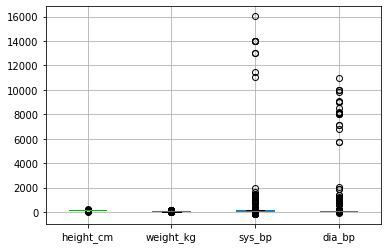

In [12]:
cardio.boxplot(column=['height_cm', 'weight_kg', 'sys_bp', 'dia_bp'])
plt.show

The columns mentioned above have outliers. According to data available systolic BP more than 180 and below/equal to 80 is fatal and diastolic BP lower than 60 and greater than 180. Weight less than 25 kgs and height lesser/equal to 100 cm can be removed. 

In [21]:
# collecting all outliers
outliers = ((cardio['sys_bp'] > 180) | (cardio['sys_bp'] <= 80) | (cardio['dia_bp'] <= 50) | (cardio['dia_bp'] >180)
             | (cardio['weight_kg'] < 25) | (cardio['height_cm'] <= 100))
cardio = cardio[~outliers]

In [22]:
cardio.shape

(68273, 12)

After dropping around **2.5%** of the data, we are left with 68273 people's data.  Let's see the boxplot after removing all the outliers. 

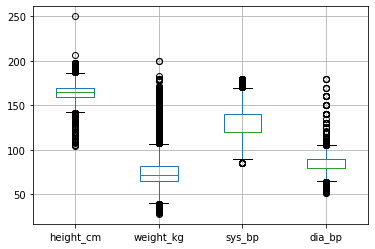

In [23]:
cardio.boxplot(column=['height_cm', 'weight_kg', 'sys_bp', 'dia_bp'])
plt.show()

Corelation of given data with target variable!

As the data given (cardio) is to define whether the person/patient has cardiovascular disease. So we need to find, which column has a relation with disease. We need to compare each column with target column  [**'cardio'**] to find out co-relation. This can be done by usig *sns.stripplot()* function or hetmap function to visualise easily.

-  *P.S.* cardio is whole data and 'cardio' is the target column.

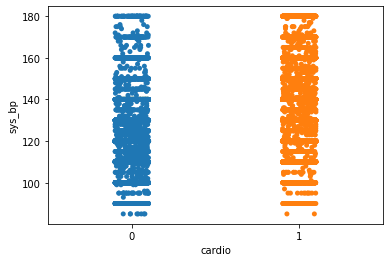

In [26]:
sns.stripplot(x = cardio['cardio'],y=cardio['sys_bp'])

As we can see that sripplot doen't give much meaning  to analyze, we can use other functions to get the corelation.

In [29]:
correlation = cardio.corr()
correlation

,age,gender,height_cm,weight_kg,sys_bp,dia_bp,cholestrol,glucose,smoking,alcohol_in,active,cardio
age,1.000000,-0.023798,-0.085186,0.053638,0.211357,0.152936,0.155115,0.098469,-0.047773,-0.028963,-0.010649,0.238949
gender,-0.023798,1.000000,0.511913,0.156338,0.060324,0.065342,-0.037322,-0.021872,0.337926,0.170223,0.005306,0.006289
height_cm,-0.085186,0.511913,1.000000,0.303239,0.017873,0.034897,-0.054073,-0.021317,0.192814,0.096078,-0.009330,-0.012432
weight_kg,0.053638,0.156338,0.303239,1.000000,0.267349,0.248191,0.139817,0.105656,0.066781,0.067958,-0.017521,0.178007
sys_bp,0.211357,0.060324,0.017873,0.267349,1.000000,0.710742,0.194501,0.092151,0.026189,0.030900,-0.001158,0.432101
dia_bp,0.152936,0.065342,0.034897,0.248191,0.710742,1.000000,0.159705,0.073587,0.023407,0.039762,-0.000559,0.339604
cholestrol,0.155115,-0.037322,-0.054073,0.139817,0.194501,0.159705,1.000000,0.450612,0.009810,0.034503,0.008795,0.220890
glucose,0.098469,-0.021872,-0.021317,0.105656,0.092151,0.073587,0.450612,1.000000,-0.006124,0.009975,-0.007950,0.088924
smoking,-0.047773,0.337926,0.192814,0.066781,0.026189,0.023407,0.009810,-0.006124,1.000000,0.337572,0.025028,-0.016556
alcohol_in,-0.028963,0.170223,0.096078,0.067958,0.030900,0.039762,0.034503,0.009975,0.337572,1.000000,0.024739,-0.008350


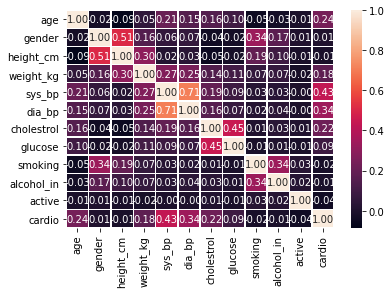

In [32]:
sns.heatmap(correlation, annot=True, fmt = '.2f', linewidths = 0.5)

We can see from **correlation**, the number represents the intensity of corelation. The number varies from -1 to 1 with 1 being same or linearly dependent. the number closer to 0 represents there is little or no relation between the variables and closer to one represents the percentage/ impact it has on each other variable.

- As seen in the heatmap, systolic and diastolic blood pressures have high relation with target variable or these values in those particular columns ['sys_bp' , 'dia_bp'] are more important to identify if the person has cardio-vascular disease. 

- We can also see that height - gender, cholestrol-glucose, smoking-alcohoal_intake have corelations. 

- Also to note that around 20% of aged and cholestrol people have cardiovascular disease.

To understand whether male or female gender people have disease and mostly at what age!
- let's determine the gender
- then determine the age

In [41]:
# Determining the gender
male_cardio = ((cardio['gender'] == 1) & (cardio['cardio'] == 1)).sum()
female_cardio = ((cardio['gender'] == 2) & (cardio['cardio'] == 1)).sum()
print("There are {} male patients and {} female patients".format(male_cardio,female_cardio) )

There are 21866 male patients and 11858 female patients


In [57]:
# Determining the age 
male = cardio[(cardio['gender'] == 1) & (cardio['cardio'] == 1)]
male_age = (male['age'].mean())/366
female = cardio[(cardio['gender'] == 2) & (cardio['cardio'] == 1)]
female_age = (female['age'].mean())/366

print("The male people mostly get at {} and female people at {} .".format(int(male_age), int(female_age)))

The male people mostly get at 55 and female people at 54 .


As we can see that people above 50 in general will be prone to cardio vascular disease. These can be smoking or alcohol intake or high cholestrol or high glucose levels.

 We can still analyze on these particular columns to see  the main cause other than BP that leads to these diseases.